In [165]:
import sklearn
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import roc_curve,auc

In [ ]:
## reading data
df= pd.read_csv("CombinedWine.csv")
df.head()

In [ ]:
target_column = ['Type'] 
predictors = ['fixed acidity','volatile acidity' ,'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [ ]:
data=df[predictors].to_numpy()
label=df[target_column].to_numpy()
data[0,]

In [ ]:
labels= (label=="Red")
labels.shape

In [ ]:
## splitting data into training and testing sets (75-25)
random.seed(123)
train_X, test_X, train_Y,test_Y=train_test_split(data, labels, test_size=0.25, random_state=40)
train_Y= train_Y.flatten()
test_Y=test_Y.flatten()

In [199]:
## Creating a Neural netwrok object
mlp1 = MLPClassifier(hidden_layer_sizes=(2,1), activation='relu', solver='adam', max_iter=1800)

In [ ]:
train_X_norm= (train_X - train_X.mean(axis=0,keepdims=True))/train_X.std(axis=0,keepdims=True)
test_X_norm= (test_X - test_X.mean(axis=0,keepdims=True))/test_X.std(axis=0,keepdims=True)

In [210]:
## Training model on increments of 232 samples to generate the train/test error vs training size graph

size=[]
train_error1=[]
test_error1=[]
for i in range(21):
    size.append(232*(i+1))

for s in size:
    indices = np.random.randint(0,4872,s)
    X_data=train_X_norm[indices,:]
    Y_data=train_Y[indices]
    mod=mlp1.fit(X_data,Y_data)
    train_error1.append(1-mod.score(X_data,Y_data))
    test_error1.append(1-mod.score(test_X_norm,test_Y))
    

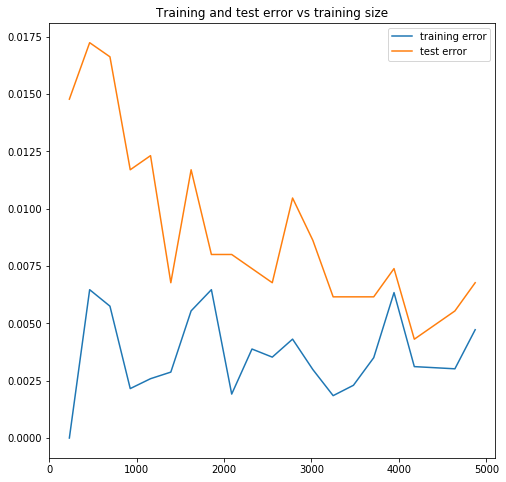

In [229]:
## Plotting the graph

new_size=np.array(size)
new_size=np.delete(new_size,18)
new_train_error= np.array(train_error1)
new_train_error=np.delete(new_train_error,18)
new_test_error= np.array(test_error1)
new_test_error=np.delete(new_test_error,18)
new_size.shape

plt.figure(figsize=(8, 8))
plt.subplots_adjust()
plt.title("Training and test error vs training size")
plt.plot(new_size,new_train_error,label="training error")
plt.plot(new_size,new_test_error,label="test error")
plt.legend()
plt.show()

In [221]:
## Generating the confusion matrix

mod=mlp1.fit(train_X_norm, train_Y)
sklearn.metrics.confusion_matrix(test_Y.reshape(-1), mod.predict(test_X_norm),np.array([1,0]))

array([[ 387,    6],
       [   5, 1227]], dtype=int64)

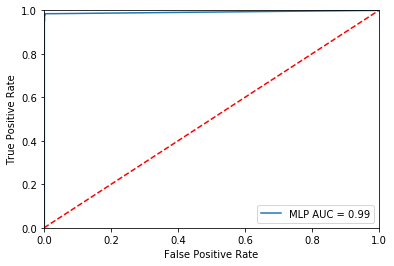

In [230]:
## generating the ROC, AUC curve

sklearn.metrics.confusion_matrix(test_Y,mod.predict(test_X_norm))
fpr2, tpr2, threshold = roc_curve(test_Y, mod.predict_proba(test_X_norm)[:,1])
roc_auc2= auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr2, tpr2, label = 'MLP AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()